In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_predict
from scipy.stats.stats import pearsonr

In [2]:
# Set working directory
os.chdir(r"C:\Users\remar\Downloads\EdWisor\Project Bike Rental Count")
os.getcwd()

'C:\\Users\\remar\\Downloads\\EdWisor\\Project Bike Rental Count'

In [3]:
# Load Data
Data_Day = pd.read_csv("day.csv")

# EXPLORATORY DATA ANALYSIS

In [4]:
#Check Type of DataFrame
print(type(Data_Day))

<class 'pandas.core.frame.DataFrame'>


In [5]:
#Data Types of Varaibles
print(Data_Day.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [6]:
#Dimension
print(Data_Day.shape)

(731, 16)


In [7]:
# Index range
print(Data_Day.index)
#columns 
print(Data_Day.columns)

RangeIndex(start=0, stop=731, step=1)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [8]:
#unique values present in each variable
print(Data_Day.nunique())

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [9]:
# variable "instant" can be dropped as it simply represents the index
# Variable "dteday" can be ignored as output is not based on time series analysis
# casual and registered variables can be removed, as these two sums to dependent variable count

Data_Day = Data_Day.drop(Data_Day.columns[[0, 1, 13, 14]], axis = "columns")
print(Data_Day.shape)

(731, 12)


In [10]:
#Defining numeric and categorical variables and saving in specific array

numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# DATA PRE PROCESSING

Missing Value Analysis

In [11]:
#sum of missing values 
Data_Day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

No missing values found

# Outlier Analysis

temp


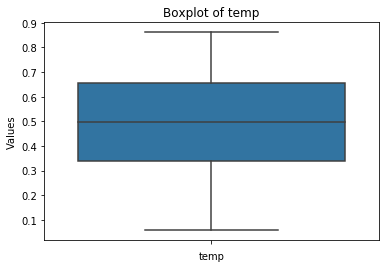

atemp


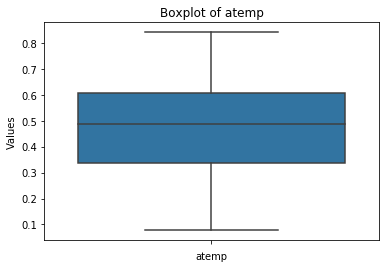

hum


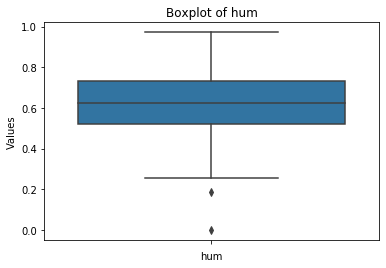

windspeed


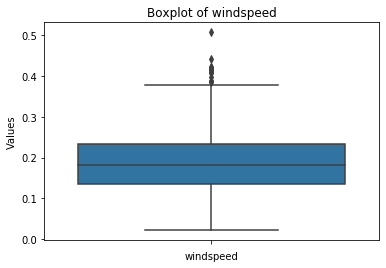

cnt


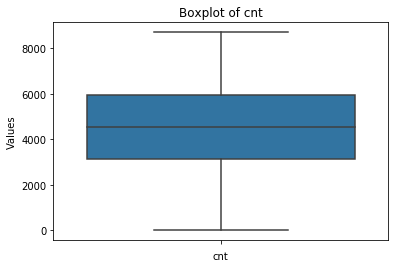

In [12]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

outliers are found in windspeed and humidity variables.

In [13]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# replace outliers with NA

    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.14041600000000015
Upperfence= 1.1329160000000003
IQR =0.3183330000000001
atemp
Innerfence= -0.06829675000000018
Upperfence= 1.0147412500000002
IQR =0.2707595000000001
hum
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645
cnt
Innerfence= -1054.0
Upperfence= 10162.0
IQR =2804.0


In [14]:
Data_Day.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

In [15]:
# total 15 outliers found. Now, impute the values, by the help of median.

Data_Day['hum'] = Data_Day['hum'].fillna(Data_Day['hum'].median())
Data_Day['windspeed'] = Data_Day['windspeed'].fillna(Data_Day['windspeed'].median())

In [16]:
# Check NA Values
Data_Day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [17]:
#Summary of the dataset
Data_Day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629354,0.186257,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.139566,0.071156,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.178802,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.229786,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,8714.000000


# DATA UNDERSTANDING

Attributes distributions and trends

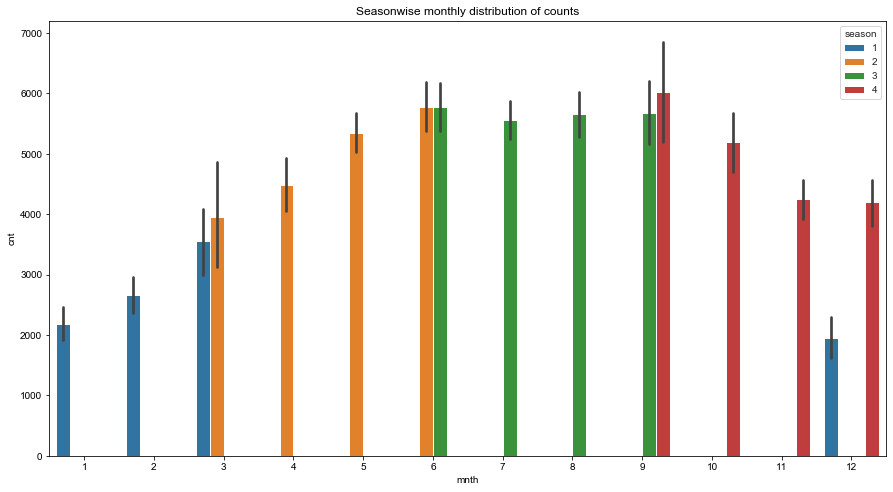

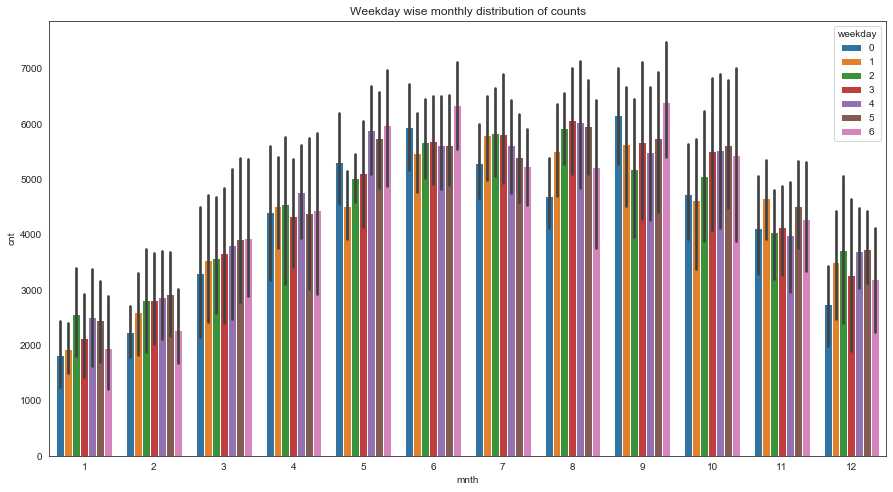

In [18]:
#Monthly distribution of counts
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='mnth',y='cnt',data=Data_Day[['mnth','cnt','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='mnth',y='cnt',data=Data_Day[['mnth','cnt','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

From the above plots, we can observed that increasing the bike rental count in springe and summer season and then decreasing the bike rental count in fall and winter season. Here,

season 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter

Yearly wise distribution of counts

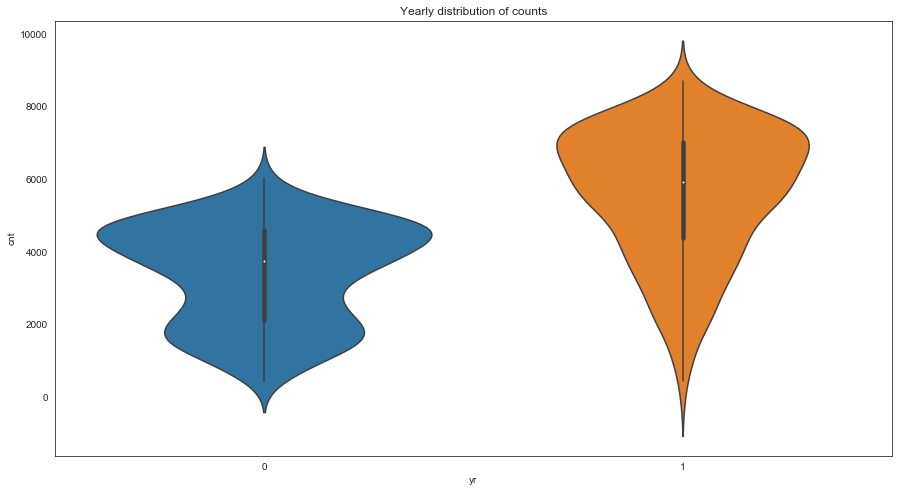

In [19]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='yr',y='cnt',data=Data_Day[['yr','cnt']])
ax.set_title('Yearly distribution of counts')
plt.show()

From the violin plot, we can observed that the bike rental count distribution is highest in year 2012 then in year 2011.

Here,
year 0-> 2011, year 1-> 2012

Holiday wise distribution of counts

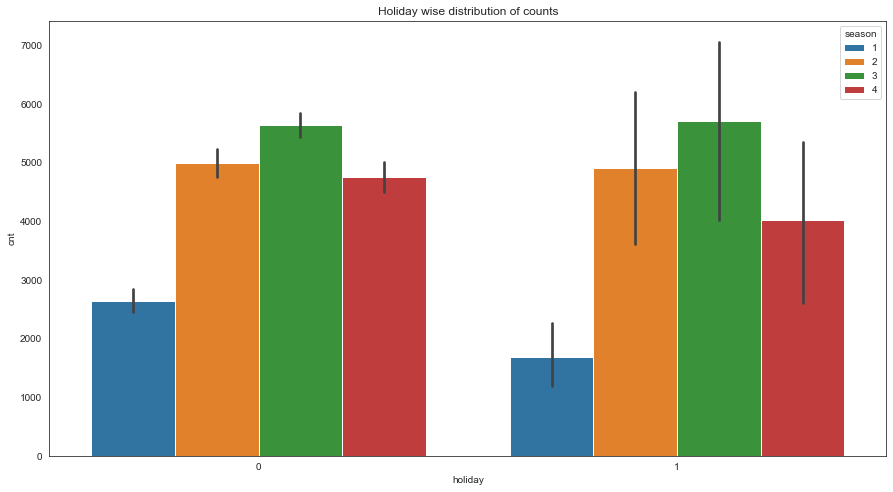

In [20]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=Data_Day,x='holiday',y='cnt',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

Here, 0->No holiday, 1-> holiday

Workingday wise distribution of counts

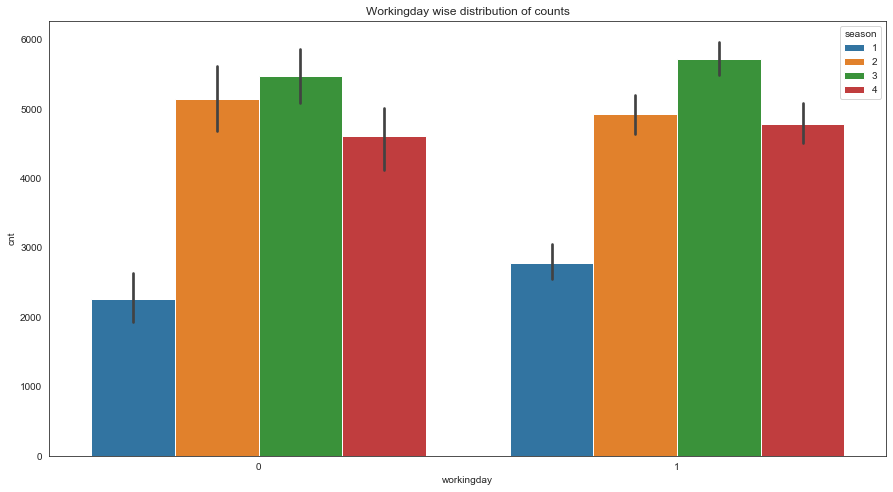

In [21]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=Data_Day,x='workingday',y='cnt',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during workingday the bike rental counts is quite highest compared to during no workingday for different seasons.

Here, 0-> No workingday, 1-> workingday

Weather_condition distribution of counts

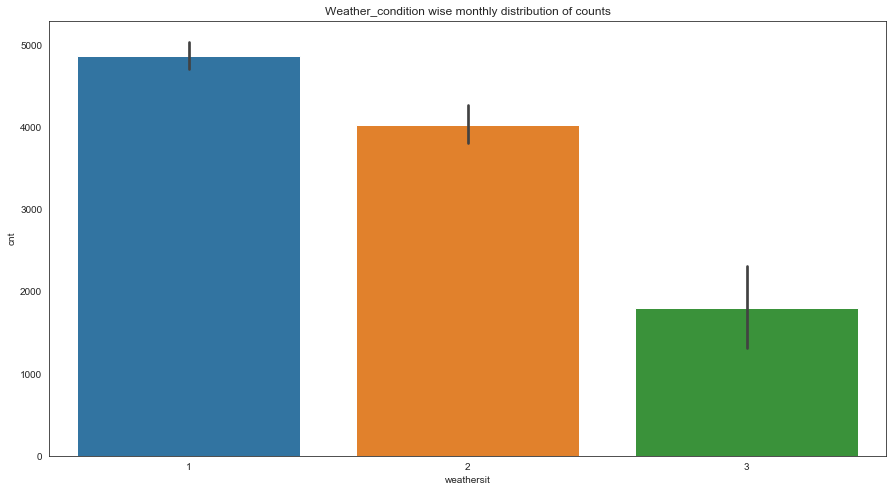

In [22]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weathersit',y='cnt',data=Data_Day[['mnth','cnt','weathersit']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

From the above bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

Replace and impute the outliers

Normal Probability Plot

Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.

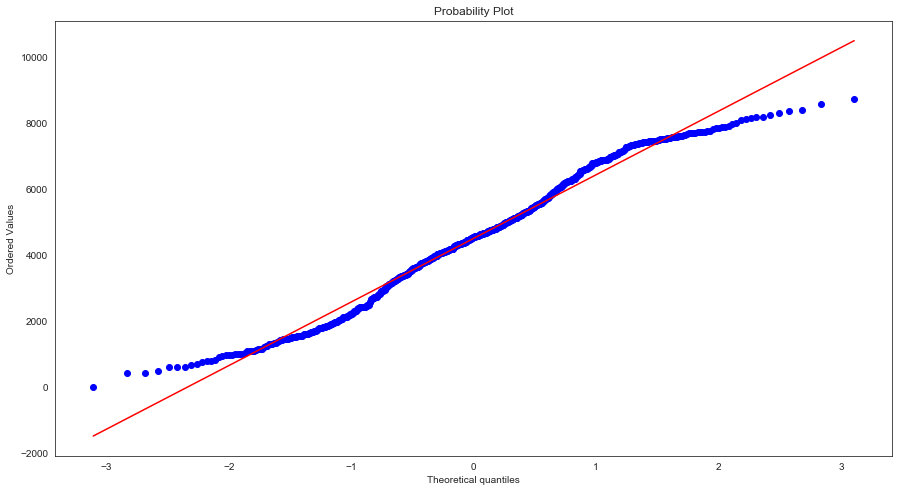

In [23]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(Data_Day.cnt.tolist(),dist='norm',plot=plt)
plt.show()

The above probability plot, the some target variable data points deviates from normality.

# FEATURE SELECTION

In [24]:
# Correlation Analysis and Anova test to find varaibles which can be excluded

Data_Day_cor = Data_Day.loc[:, numeric_var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.123723  -0.138937  0.627494
atemp      0.991702  1.000000  0.137312  -0.164157  0.631066
hum        0.123723  0.137312  1.000000  -0.200237 -0.121454
windspeed -0.138937 -0.164157 -0.200237   1.000000 -0.215203
cnt        0.627494  0.631066 -0.121454  -0.215203  1.000000


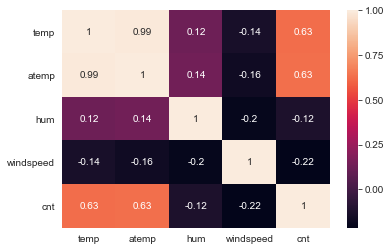

In [25]:
heatmap = sns.heatmap(correlation_result, annot=True)

From heatmap plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

In [26]:
# Anova Test

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in categorical_var:
    mod = ols('cnt' + '~' + i, data = Data_Day).fit()
    anova_table = sm.stats.anova_lm(mod, typ = 2)
    print(anova_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

It is found that holiday, weekday and workingday has p value > 0.05, by which, we accept null hypothesis.

In [27]:
#Dimension Reduction

Data_Day = Data_Day.drop(['atemp', 'holiday', 'weekday', 'workingday'], axis = "columns")
print(Data_Day.shape)

(731, 8)


In [28]:
#Final Variables

numeric_var = ["temp","hum","windspeed","cnt"]   # numeric variables
categorical_var = ["season", "yr", "mnth", "weathersit"]   # categorical variables

# FEATURE SCALING

temp


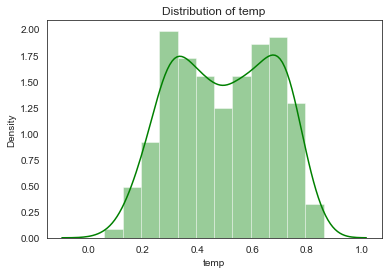

hum


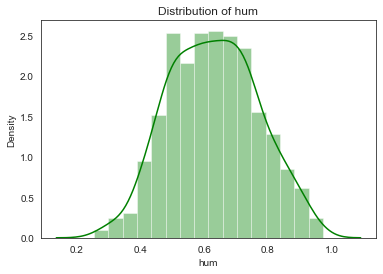

windspeed


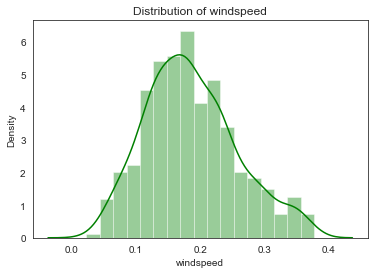

cnt


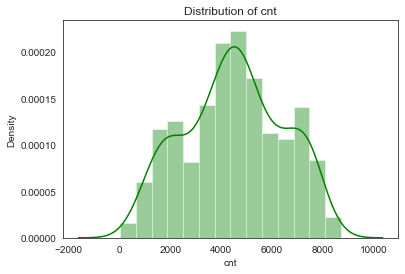

In [29]:
# Check normality 
for i in numeric_var:
    print(i)
    sns.distplot(Data_Day[i], bins = 'auto', color = 'green')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

Distributions are almost symmetric.

In [30]:
# Check min and max values
Data_Day.describe()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.629354,0.186257,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.139566,0.071156,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.627500,0.178802,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.229786,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


As we can see everything is normalized here so, there is no need of Feature scaling in this.

# MODEL DEVELOPMENT

In [31]:
df = Data_Day.copy()
Data_Day = df.copy()

In [32]:
# Create dummy variables

Data_Day = pd.get_dummies(Data_Day, columns = categorical_var) 
Data_Day.shape

(731, 25)

In [33]:
Data_Day.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
df_for_KFCV = Data_Day

In [35]:
#Define Error Metrics.

def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE

def Rsquare(y_actual, y_predicted):
    Rsquare = np.corrcoef(y_actual,y_predicted)**2
    return Rsquare

In [36]:
#Predictors and target

X = Data_Day.drop(['cnt'], axis = "columns")
y = Data_Day['cnt']

In [37]:
#Split the dataset into the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [38]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
DTModel = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

# Prediction

DTTest = DTModel.predict(X_test)

# MAPE
DTMape_Test = MAPE(y_test, DTTest)


# Rsquare - Test Data

DTR2_Test = Rsquare(y_test, DTTest)

DTR2_Test1 = DTR2_Test.ravel()

DTR2_Test2 = float(DTR2_Test1[1])


print("MAPE ="+str(DTMape_Test))
print("Accuracy =" + str(100 - DTMape_Test))
print("Rsquare ="+str(DTR2_Test2))

MAPE =36.94809301452646
Accuracy =63.05190698547354
Rsquare =0.6544606873373333


In [39]:
DTModel

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [40]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Predictions
RFTest = RFModel.predict(X_test)

# MAPE 
RFMape_Test = MAPE(y_test, RFTest)

# Rsquare - Test Data

RFR2_Test = Rsquare(y_test, RFTest)

RFR2_Test1 = RFR2_Test.ravel()

RFR2_Test2 = float(RFR2_Test1[1])

print("MAPE ="+str(RFMape_Test))
print("Accuracy =" + str(100 - RFMape_Test))
print("Rsquare ="+str(RFR2_Test2))

MAPE =20.734747916576364
Accuracy =79.26525208342363
Rsquare =0.8877716957918188


In [41]:
RFModel

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [42]:
#LINEAR REGRESSION MODEL

import statsmodels.api as sm
LRModel= sm.OLS(y_train, X_train).fit()
print(LRModel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.63e-203
Time:                        11:18:40   Log-Likelihood:                -4716.2
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     563   BIC:                             9566.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp          4807.6605    477.418     10.070   

In [43]:
#Prediction

LRTest = LRModel.predict(X_test)

#MAPE

LRMape_Test = MAPE(y_test, LRTest)


#Rsquare -Test Data

LRR2_Test = Rsquare(y_test, LRTest)

LRR2_Test1 = LRR2_Test.ravel()

LRR2_Test2 = float(LRR2_Test1[1])


print("MAPE ="+str(LRMape_Test))
print("Accuracy =" + str(100 - LRMape_Test))
print("Rsquare ="+str(LRR2_Test2))

MAPE =18.80069603820695
Accuracy =81.19930396179305
Rsquare =0.8436040019904952


# KFold Cross Validation

In [44]:
df_for_KFCV.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
X_kf = df_for_KFCV.drop(['cnt'], axis = "columns")
y_kf = df_for_KFCV['cnt']
X_kf.head()

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [46]:
cross_val_score(DecisionTreeRegressor(max_depth=2), X_kf,y_kf, cv = 3)
#array([ 0.23365401, -0.23313404,  0.15690143])

DT_Score = cross_val_score(DecisionTreeRegressor(max_depth=2), X_kf,y_kf, cv = 3)
np.average(DT_Score)

0.05247379896663843

In [47]:
cross_val_score(RandomForestRegressor(), X_kf,y_kf, cv = 3)
#array([0.69521348, 0.27999794, 0.452253  ])
RF_Score = cross_val_score(RandomForestRegressor(n_estimators = 100), X_kf,y_kf, cv = 3)
np.average(RF_Score)

C:\Users\remar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\remar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\remar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.47847972653859544

In [48]:
from sklearn.linear_model import LinearRegression
cross_val_score(LinearRegression(), X_kf,y_kf, cv = 3)
#array([0.73477372, 0.6035598 , 0.54577344])

LR_Score = cross_val_score(LinearRegression(), X_kf,y_kf, cv = 3)
np.average(LR_Score)

0.6279077847020141

In [49]:
# SAMPLE INPUT OUTPUT
LRModel.predict([[0.4, 0.8, 0.5,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0]])

array([834.64751804])

Putting all the variables humidity, weather, temperature , season, month and year,
it is found that for those particular input we got above result